In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing adtaset
df = pd.read_csv("Dataset/Crop_recommendation.csv")

In [23]:
# Checking first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
# Checking last 5 rows
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
# Getting dimensions of dataset
df.shape

(2200, 8)

In [11]:
# Getting info about dataset attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
# Checking for missing values for attributes
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [22]:
# Checking the duplicate values in dataset
df.duplicated().sum()

0

In [20]:
# Checking distribution of target attribute
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [24]:
# Getting statistical data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


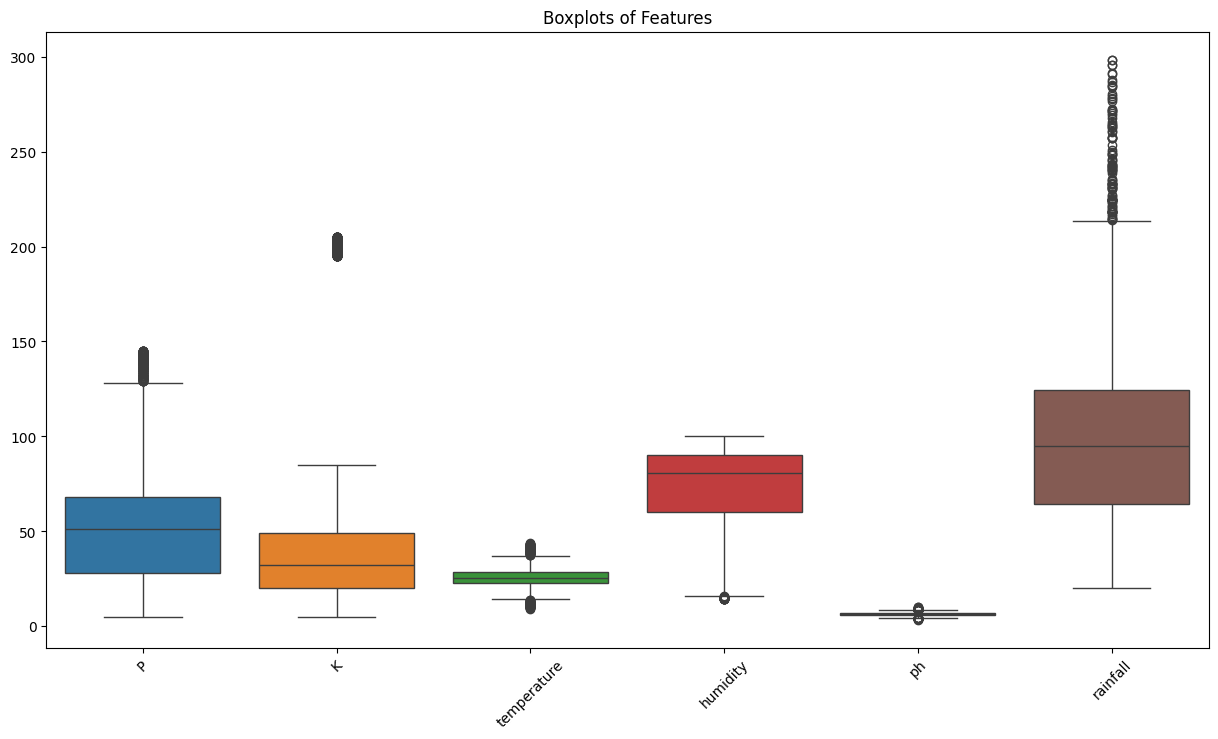

In [ ]:
# Boxplots for Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('N', axis=1))
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

#### Observations
- Outliers present in dataset for P, K, temperature, humidity and rainfall

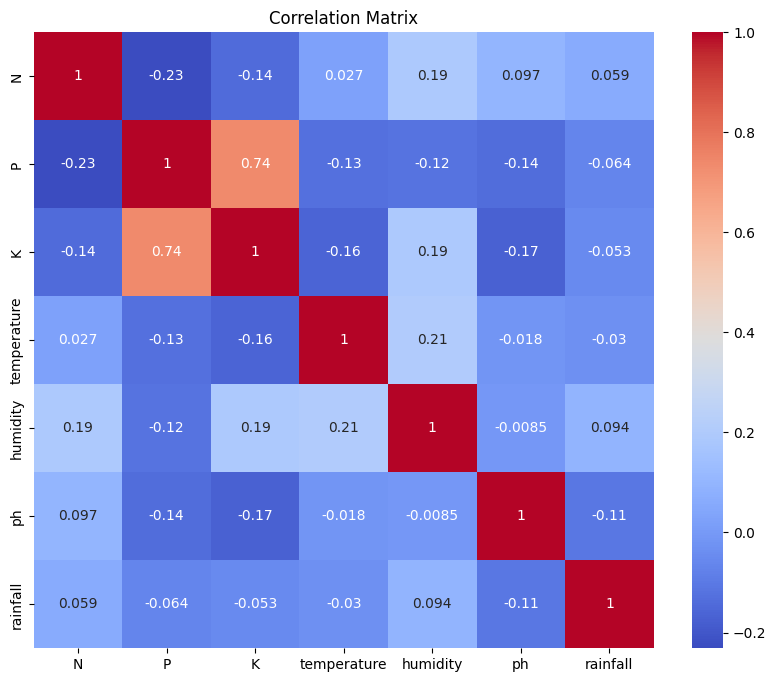

In [27]:
# Correlation Matrix 
corr = df.drop('label', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Observations
- Likely a moderate-to-strong negative correlation between temperature and humidity.
- Weak or No Correlation: Nutrients like nitrogen (N), phosphorus (P), and potassium (K) typically show weak correlations with environmental factors (temperature, humidity, rainfall).
- Likely a moderate positive correlation between rainfall and humidity.
- Nutrients like nitrogen (N), phosphorus (P), and potassium (K) typically show weak correlations with environmental factors (temperature, humidity, rainfall).
- pH often shows minimal correlation with other variables (close to 0).
- Slight negative correlation between temperature and rainfall.

#### Conclusion
No Multicollinearity: Most features (e.g., N, P, K, pH) are weakly correlated, meaning they contribute unique information.
Implication: No need to drop features for multicollinearity in models like Random Forest.